# CMSE 802 In-class assignment: RegEx
## Date: 11/29/2018
## Due: 11/29/2018; 10:30 PM

### This assignment is about regular expression and text analysis.

---
### Your name: Boyao Zhu

----
### 1. Review of Pre-Class Assignment

This is a great resource for experimenting with regular expressions: 

https://regex101.com/

In [1]:
import re

In [2]:
dir(re)

['A',
 'ASCII',
 'DEBUG',
 'DOTALL',
 'I',
 'IGNORECASE',
 'L',
 'LOCALE',
 'M',
 'MULTILINE',
 'RegexFlag',
 'S',
 'Scanner',
 'T',
 'TEMPLATE',
 'U',
 'UNICODE',
 'VERBOSE',
 'X',
 '_MAXCACHE',
 '__all__',
 '__builtins__',
 '__cached__',
 '__doc__',
 '__file__',
 '__loader__',
 '__name__',
 '__package__',
 '__spec__',
 '__version__',
 '_alphanum_bytes',
 '_alphanum_str',
 '_cache',
 '_compile',
 '_compile_repl',
 '_expand',
 '_locale',
 '_pattern_type',
 '_pickle',
 '_subx',
 'compile',
 'copyreg',
 'enum',
 'error',
 'escape',
 'findall',
 'finditer',
 'fullmatch',
 'functools',
 'match',
 'purge',
 'search',
 'split',
 'sre_compile',
 'sre_parse',
 'sub',
 'subn',
 'template']

In [3]:
help(re)

Help on module re:

NAME
    re - Support for regular expressions (RE).

MODULE REFERENCE
    https://docs.python.org/3.6/library/re
    
    The following documentation is automatically generated from the Python
    source files.  It may be incomplete, incorrect or include features that
    are considered implementation detail and may vary between Python
    implementations.  When in doubt, consult the module reference at the
    location listed above.

DESCRIPTION
    This module provides regular expression matching operations similar to
    those found in Perl.  It supports both 8-bit and Unicode strings; both
    the pattern and the strings being processed can contain null bytes and
    characters outside the US ASCII range.
    
    Regular expressions can contain both special and ordinary characters.
    Most ordinary characters, like "A", "a", or "0", are the simplest
    regular expressions; they simply match themselves.  You can
    concatenate ordinary characters, so last mat

----
### 2. Example of Python regular expressions

Here is an example of how regular expressions in the wild:

In [4]:
example_codes = ["SW1A 0AA", # House of Commons
                 "SW1A 1AA", # Buckingham Palace
                 "SW1A 2AA", # Downing Street
                 "BX3 2BB", # Barclays Bank
                 "DH98 1BT", # British Telecom
                 "N1 9GU", # Guardian Newspaper
                 "E98 1TT", # The Times
                 "TIM E22", # a fake postcode
                 "A B1 A22", # not a valid postcode
                 "EC2N 2DB", # Deutsche Bank
                 "SE9 2UG", # University of Greenwhich
                 "N1 0UY", # Islington, London
                 "EC1V 8DS", # Clerkenwell, London
                 "WC1X 9DT", # WC1X 9DT
                 "B42 1LG", # Birmingham
                 "B28 9AD", # Birmingham
                 "W12 7RJ", # London, BBC News Centre
                 "BBC 007" # a fake postcode
                ]


pattern = re.compile("[A-z]{1,2}[0-9R][0-9A-Z]? [0-9][ABD-HJLNP-UW-Z]{2}")

for postcode in example_codes:
    r = pattern.search(postcode)
    if r:
        print(postcode + " matched!")
    else:
        print(postcode + " is not a valid postcode!")

SW1A 0AA matched!
SW1A 1AA matched!
SW1A 2AA matched!
BX3 2BB matched!
DH98 1BT matched!
N1 9GU matched!
E98 1TT matched!
TIM E22 is not a valid postcode!
A B1 A22 is not a valid postcode!
EC2N 2DB matched!
SE9 2UG matched!
N1 0UY matched!
EC1V 8DS matched!
WC1X 9DT matched!
B42 1LG matched!
B28 9AD matched!
W12 7RJ matched!
BBC 007 is not a valid postcode!


-----
### 3. Using Regular Expressions to find Regular Data

**Question**: Write a regular expression to find valid **hashtag** in a body of text (ex. #Election2016, #RegexpressionsAreAwsome, #whatisahashtag). Include both positive and negative examples for testing.

In [16]:
## DO this, create some example strings for finding the above regular data
#example = ['#Election2016','#RegexpressionAreAwsome','whatisahashtag']
example = "an example sentence with #in the sentence!"
match1 = re.search('#\w*', example)
print (match1)

<_sre.SRE_Match object; span=(25, 28), match='#in'>


In [14]:
## DO this, Write some regular expressions to find valid regular data
example2 = "an example sentence with #in the sentence!"
match2 = re.search('#\w*',example2)

if match2:
    print ('found', match2.group())
else:
    print ('did not find')

found #in


**Question**: Write a regular expression to find valid **email addresses** in a body of text (ex. dirk@colbry.com, colbrydi@msu.edu, dirkcolbry+junk@gmail.com).  Include both positive and negative examples for testing. 

In [27]:
## DO this, create some example strings for finding the above regular data
example = 'dirk@colbry.com, colbrydi@msu.edu, dirkcolbry+junk@gmail.com'

match = re.findall(r'[\+\w\.-]+[\w\.-]+@[\w\.-]+',example)
match

['dirk@colbry.com', 'colbrydi@msu.edu', 'dirkcolbry+junk@gmail.com']

In [22]:
## DO this, Write some regular expressions to find valid regular data
example = "why people don't know what regex are? let me know dirk@colbry.com, colbrydi@msu.edu " \
       "dirkcolbry+junk@gmail.com"
match = re.findall(r'[\+\w\.-]+[\w\.-]+@[\w\.-]+',example)
for i in match:
    print (i)

dirk@colbry.com
colbrydi@msu.edu
dirkcolbry+junk@gmail.com


**Question**: Write a regular expression to find valid **phone number** in a body of text (ex. (517) 432-0455, 432-0455, 517-432-0455, 1-517-432-0455.  include both positive and negative examples for testing. 

In [24]:
## DO this, create some example strings for finding the above regular data

phone_num = '(517)432-0455, 432-0455, 517-432-0455, 1-517-432-0455'


In [52]:
## DO this, Write some regular expressions to find valid regular data
pattern = re.compile(r'(\d{3}[-\.\s]\d{3}[-\.\s]\d{4}|\(\d{3}\)\s*\d{3}[-\.\s]\d{4}|\d{3}[-\.\s]\d{4})')

results = pattern.findall(phone_num)
print (results)

['(517)432-0455', '432-0455', '517-432-0455', '517-432-0455']


-----
### 4. Where else can we use Regular Expressions?
Regular expressions are well over 30 years old.  No two programming languages treat regular expressions the same way but a lot of them are extremely similar.  Lets try a few examples.

First we need some data to play with. Download the following URL into a file. 

https://msu.edu/~colbrydi/contact.html


**Question:** Use regular expression to find all valid **phone numbers** in the webpage.

In [47]:
# Your code:
filename = 'test.txt'
import os
if os.path.exists(filename):
    data = open(filename,'r')
    bulk = data.read()
    
match = re.compile(r"\(\d{3}\D{0,3}\d{3}\D{0,3}\d{4}")

results = match.findall(bulk)
print (results)

['(517) 884-1477']


-----
### 5. Text Analysis 

Natural language toolkit (NLTK) is a set of python libraries that are broadly used for text analysis, and for machine learning to interpret or summarize documents. Here, we can take a quick glimpse of it. Run the following codes and answer the associated questions. 

In [57]:

document = """To Sherlock Holmes she is always the woman. I have
seldom heard him mention her under any other name. In his eyes she
eclipses and predominates the whole of her sex. It was not that he
felt any emotion akin to love for Irene Adler. All emotions, and that
one particularly, were abhorrent to his cold, precise but admirably
balanced mind. He was, I take it, the most perfect reasoning and
observing machine that the world has seen, but as a lover he would
have placed himself in a false position. He never spoke of the softer
passions, save with a gibe and a sneer. They were admirable things for
the observer-excellent for drawing the veil from men’s motives and
actions. But for the trained reasoner to admit such intrusions into
his own delicate and finely adjusted temperament was to introduce a
distracting factor which might throw a doubt upon all his mental
results. Grit in a sensitive instrument, or a crack in one of his own
high-power lenses, would not be more disturbing than a strong emotion
in a nature such as his. And yet there was but one woman to him, and
that woman was the late Irene Adler, of dubious and questionable
memory.
"""

document = ' '.join(document.strip().split('\n'))
print (document)


To Sherlock Holmes she is always the woman. I have seldom heard him mention her under any other name. In his eyes she eclipses and predominates the whole of her sex. It was not that he felt any emotion akin to love for Irene Adler. All emotions, and that one particularly, were abhorrent to his cold, precise but admirably balanced mind. He was, I take it, the most perfect reasoning and observing machine that the world has seen, but as a lover he would have placed himself in a false position. He never spoke of the softer passions, save with a gibe and a sneer. They were admirable things for the observer-excellent for drawing the veil from men’s motives and actions. But for the trained reasoner to admit such intrusions into his own delicate and finely adjusted temperament was to introduce a distracting factor which might throw a doubt upon all his mental results. Grit in a sensitive instrument, or a crack in one of his own high-power lenses, would not be more disturbing than a strong emot

In [68]:
from nltk.tokenize.punkt import PunktSentenceTokenizer

sentence_tokenizer = PunktSentenceTokenizer()
sentences = sentence_tokenizer.tokenize(document) 
print (len(sentences))

11


**Question: ** What is the code above doing?

** Your answer: ** divide the whole paragraph into several strings.

In [69]:
from sklearn.feature_extraction.text import TfidfTransformer, CountVectorizer

bow_matrix = CountVectorizer().fit_transform(sentences) 
normalized = TfidfTransformer().fit_transform(bow_matrix)
#print (bow_matrix)
#print (normalized)

**Question: ** What is the code above doing?

** Your answer: ** Convert a collection of text documents to a matrix of token counts

Transform a count matrix to a normalized tf or tf-idf representation

In [71]:
import numpy as np

similarity_graph = normalized * normalized.T
print (similarity_graph)

  (0, 7)	0.05261648363705848
  (0, 6)	0.03330043602769291
  (0, 5)	0.04345599124508305
  (0, 2)	0.1373787918261254
  (0, 10)	0.200474192018704
  (0, 8)	0.07798957638240006
  (0, 4)	0.04305016442964163
  (0, 3)	0.047679028231138114
  (0, 0)	1.0000000000000002
  (1, 3)	0.07819597109328738
  (1, 2)	0.08421430246039584
  (1, 10)	0.05807146483211601
  (1, 5)	0.051716119948895786
  (1, 1)	1.0
  (2, 4)	0.07004068834134561
  (2, 9)	0.20474294790009098
  (2, 1)	0.08421430246039584
  (2, 10)	0.11975989842465107
  (2, 8)	0.09437202555137335
  (2, 7)	0.0670179311037786
  (2, 6)	0.10690420339004944
  (2, 5)	0.09648614076563365
  (2, 2)	1.0000000000000002
  (2, 0)	0.1373787918261254
  (3, 7)	0.09249591773385425
  :	:
  (8, 2)	0.09437202555137335
  (8, 10)	0.1432796913760852
  (8, 8)	1.000000000000001
  (8, 4)	0.1725341815071735
  (8, 3)	0.10892261520973304
  (8, 0)	0.07798957638240006
  (9, 3)	0.09110741387143768
  (9, 10)	0.04706137616071955
  (9, 6)	0.02852115859213008
  (9, 8)	0.12388421107706307

**Question: ** What is the code above doing?

** Your answer: ** Multiplying Normalized matrix with its transpose

[(0.11148426389792518,
  'And yet there was but one woman to him, and that woman was the late Irene Adler, of dubious and questionable memory.'),
 (0.09838560290878214,
  'In his eyes she eclipses and predominates the whole of her sex.'),
 (0.09825615495072643,
  'He was, I take it, the most perfect reasoning and observing machine that the world has seen, but as a lover he would have placed himself in a false position.'),
 (0.09744270669005967,
  'It was not that he felt any emotion akin to love for Irene Adler.'),
 (0.09433617163509289,
  'But for the trained reasoner to admit such intrusions into his own delicate and finely adjusted temperament was to introduce a distracting factor which might throw a doubt upon all his mental results.'),
 (0.0892656646614313,
  'All emotions, and that one particularly, were abhorrent to his cold, precise but admirably balanced mind.'),
 (0.08636822789376784,
  'Grit in a sensitive instrument, or a crack in one of his own high-power lenses, would not

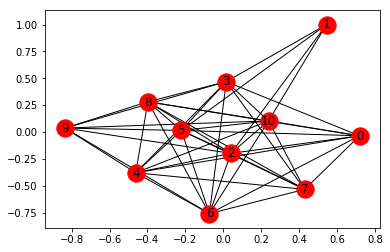

In [72]:
import networkx as nx
import matplotlib.pyplot as plt
%matplotlib inline

nx_graph = nx.from_scipy_sparse_matrix(similarity_graph)

nx.draw_networkx(nx_graph)

scores = nx.pagerank(nx_graph)
sorted(((scores[i],s) for i,s in enumerate(sentences)),reverse=True)


**Question: ** What is the code above doing?

** Your answer: ** doing graph and calculate its pagerank

---
### Congratulations, we're done!

** Don't forget to add your names to the top!!**

Log into the course D2L website (d2l.msu.edu) and go to "Assessments > Assignments > In-class Assignment 20181129".